# Imports

In [47]:
# standard libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sql imports
import mysql.connector

# Linear Regression import 
import statsmodels.api as sm


### Connectiong to Server

In [2]:
# SQL server information
sql_username  = 'root'
sql_password  = 'test'
sql_host      = 'localhost'
sql_port      = '3306'
sql_db_name  = 'sakila'


# creating connector engine
sqldb = mysql.connector.connect(
    host = sql_host,
    user = sql_username,
    password =  sql_password,
    port = sql_port,
    database =  sql_db_name
)

# allows me to create querys in python
mycursor = sqldb.cursor()


### Part II Questions

#### Question 1
Create a horizontal bar chart that shows all the film categories and how many films fall in that
category. The bar chart should be sorted so the largest film category is at the top and the
smallest is at the botom.

C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\21065720.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


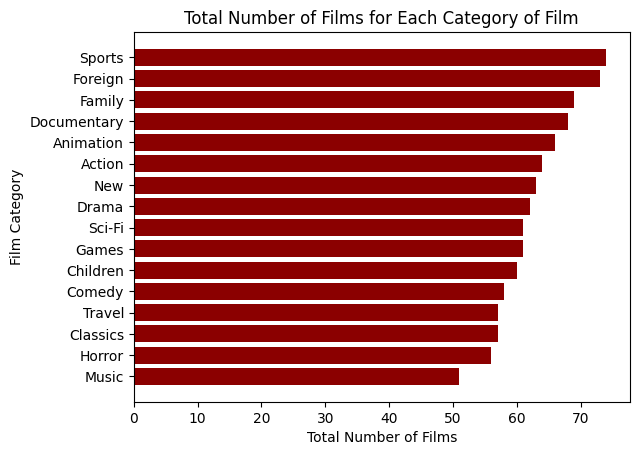

In [27]:
# Create a horizontal bar chart that shows all the film categories and how many films fall in that
# category. The bar chart should be sorted so the largest film category is at the top and the
# smallest is at the botom.

# getting db for film_category

# creating query 
query =  query = """
    SELECT c.name AS category_name, COUNT(fc.film_id) AS num_films
    FROM film_category fc
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY c.name
    ORDER BY num_films ASC;
"""

# loading query into data frame 
df = pd.read_sql(query,sqldb)

# validating query
df.head()

# Creating graph
plt.barh(df['category_name'].astype(str), df['num_films'], color = 'darkred')
plt.xlabel('Total Number of Films')
plt.ylabel('Film Category')
plt.title('Total Number of Films for Each Category of Film')
plt.show()


#### Question 2  
Create a horizontal bar chart that shows the top ten countries by city count. The bar chart
should be sorted so the country with the largest number of cities is at the top and the country
with the smallest number of cities is at the botom

C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\2522631640.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


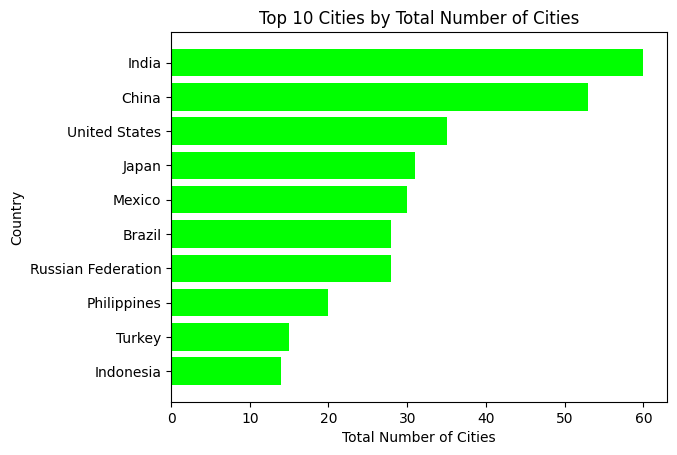

In [10]:
# Create a horizontal bar chart that shows the top ten countries by city count. The bar chart
# should be sorted so the country with the largest number of cities is at the top and the country
# with the smallest number of cities is at the botom

# creating query and dataframe 
query = """
    SELECT c.country, COUNT(ci.city_id) AS num_cities
    FROM city ci
    JOIN country c ON ci.country_id = c.country_id
    GROUP BY c.country
    ORDER BY num_cities DESC
    LIMIT 10;
"""
df = pd.read_sql(query,sqldb)

# setting the values to be in desceding
df = df.sort_values(by= 'num_cities',ascending=True)

# Checking Data Frame
df

# Creating graph
plt.barh(df['country'],df['num_cities'], color = 'lime')
plt.xlabel('Total Number of Cities')
plt.ylabel('Country')
plt.title('Top 10 Cities by Total Number of Cities')
plt.show()

#### Question 3
Create a horizontal bar chart that shows the top ten films by actor count. The bar chart should 
be sorted so the film with the largest number of actors is at the top and the film with the
smallest number of actors is at the botom.

C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\26877780.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


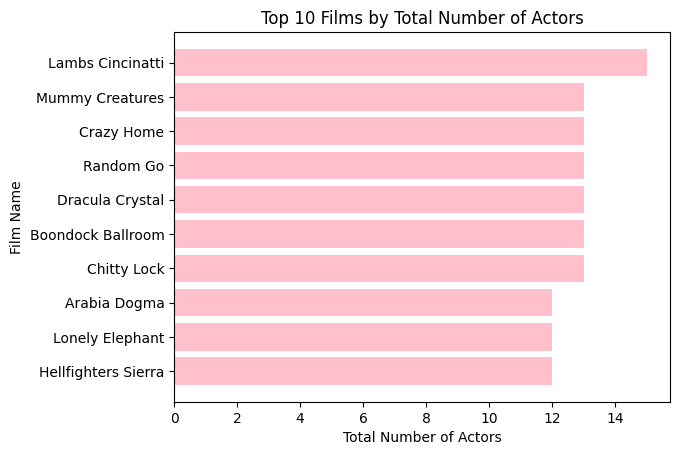

In [26]:
# Create a horizontal bar chart that shows the top ten films by actor count. The bar chart should
# be sorted so the film with the largest number of actors is at the top and the film with the
# smallest number of actors is at the botom.

# creating query and db

# need tables (film, film_actor)
# film will give the film names
# film_actor will give the numbers

query = """ 
SELECT f.title, COUNT(fa.actor_id) AS num_actors
FROM film f
JOIN film_actor fa on f.film_id = fa.film_id
GROUP BY fa.film_id, f.title
ORDER BY num_actors DESC
LIMIT 10;
"""

df = pd.read_sql(query,sqldb)

# Making title column to be in title case
df['title'] =  df['title'].str.title()
# filping order
df =  df.sort_values(by = 'num_actors',ascending=True)

# validation
df

# creating graph
plt.barh(df['title'],df['num_actors'], color = 'pink')
plt.xlabel('Total Number of Actors')
plt.ylabel('Film Name')
plt.title('Top 10 Films by Total Number of Actors')
plt.show()


#### Question 4
Create a horizontal bar chart that shows the top ten countries by total number of rentals. The
bar chart should be sorted so the country with the largest number of rentals is at the top and
the country with the smallest number of rentals is at the botom.

C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\479904957.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


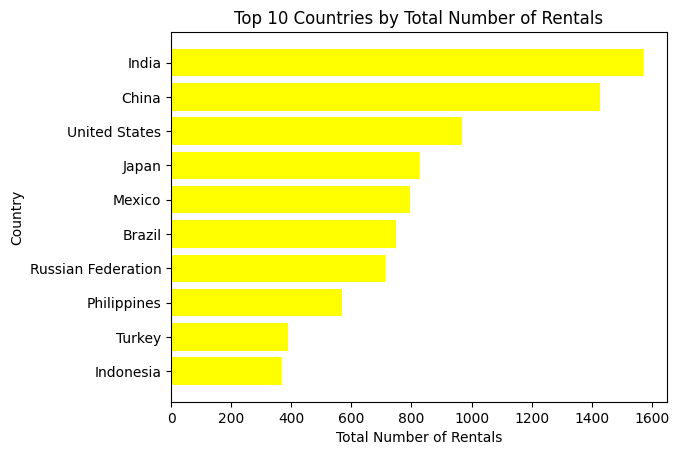

In [33]:
# Create a horizontal bar chart that shows the top ten countries by total number of rentals. The
# bar chart should be sorted so the country with the largest number of rentals is at the top and
# the country with the smallest number of rentals is at the botom.



# Creating query and db

 # need (rental, customer, address, city, country) tables

# The following Id chain goes as follows : rental - customer - address - city - country 

query = """
SELECT 
    country.country AS Country,
    COUNT(rental.rental_id) AS Total_Rentals
FROM rental
JOIN customer ON rental.customer_id = customer.customer_id
JOIN address ON customer.address_id = address.address_id
JOIN city ON address.city_id = city.city_id
JOIN country ON city.country_id = country.country_id
GROUP BY country.country
ORDER BY Total_Rentals DESC
LIMIT 10;"""


df = pd.read_sql(query,sqldb)

#changing order
df =  df.sort_values(by = 'Total_Rentals',ascending=True)

# Validation
df

# creating graph
plt.barh(df['Country'],df['Total_Rentals'], color = 'yellow')
plt.xlabel('Total Number of Rentals')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Number of Rentals')
plt.show()

#### Question 5 
Create a horizontal bar chart that shows the top ten countries by total amount of money spent.
The bar chart should be sorted so the country with the largest amount of money spent is at the
top and the country with the smallest amount of money spent is at the botom.

C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\2967142478.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


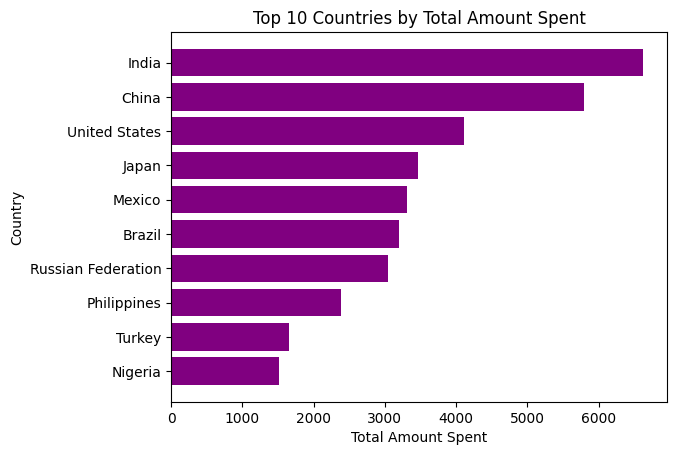

In [35]:
# Create a horizontal bar chart that shows the top ten countries by total amount of money spent.
# The bar chart should be sorted so the country with the largest amount of money spent is at the
# top and the country with the smallest amount of money spent is at the botom.

# Creating query and db

 # need (payment, customer, address, city, country) tables

# The following Id chain goes as follows : payment - customer - address - city - country 
# same as last time just doing payment amount this time

query = """
SELECT 
    country.country AS Country,
    SUM(payment.amount) AS Total_Spent
FROM payment
JOIN customer ON payment.customer_id = customer.customer_id
JOIN address ON customer.address_id = address.address_id
JOIN city ON address.city_id = city.city_id
JOIN country ON city.country_id = country.country_id
GROUP BY country.country
ORDER BY Total_Spent DESC
LIMIT 10;
"""


df = pd.read_sql(query,sqldb)

#changing order
df =  df.sort_values(by = 'Total_Spent',ascending=True)

# Validation
df

# creating graph
plt.barh(df['Country'],df['Total_Spent'], color = 'purple')
plt.xlabel('Total Amount Spent')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Amount Spent')
plt.show()

#### Question 6 
Create a scater plot comparing the number of rentals on the X axis and the amount of money
spent on the Y axis.

C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\1385110883.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


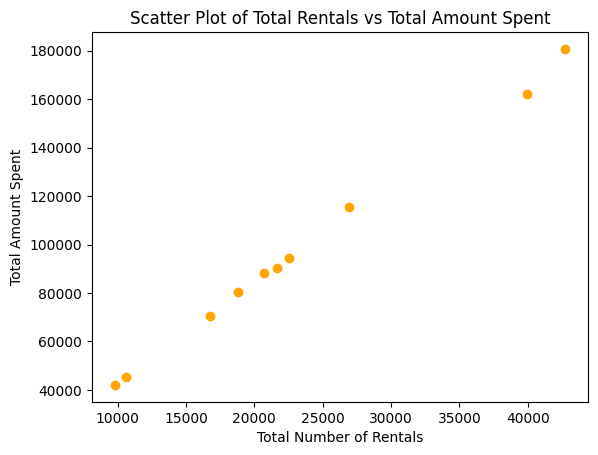

In [42]:
# Create a scater plot comparing the number of rentals on the X axis and the amount of money
# spent on the Y axis.


# Creating queries and db

query = """ 
SELECT 
    COALESCE(SUM(payment.amount), 0) AS Total_Spent,
    COALESCE(COUNT(rental.rental_id), 0) AS Total_Rentals
FROM country
LEFT JOIN city ON country.country_id = city.country_id
LEFT JOIN address ON city.city_id = address.city_id
LEFT JOIN customer ON address.address_id = customer.address_id
LEFT JOIN payment ON customer.customer_id = payment.customer_id
LEFT JOIN rental ON customer.customer_id = rental.customer_id
GROUP BY country.country
ORDER BY Total_Spent DESC, Total_Rentals DESC
LIMIT 10;
"""
df = pd.read_sql(query,sqldb)

# validation
df

# creating scatter plot 
plt.scatter(x = df['Total_Rentals'], y = df['Total_Spent'], color = 'orange')
plt.xlabel('Total Number of Rentals')
plt.ylabel('Total Amount Spent')
plt.title('Scatter Plot of Total Rentals vs Total Amount Spent')
plt.show()

### Linear Regression of Number of Rentals and Amount of Money Spent

In [49]:
# getting the whole data set

query = """ 
SELECT 
    COALESCE(SUM(payment.amount), 0) AS Total_Spent,
    COALESCE(COUNT(rental.rental_id), 0) AS Total_Rentals
FROM country
LEFT JOIN city ON country.country_id = city.country_id
LEFT JOIN address ON city.city_id = address.city_id
LEFT JOIN customer ON address.address_id = customer.address_id
LEFT JOIN payment ON customer.customer_id = payment.customer_id
LEFT JOIN rental ON customer.customer_id = rental.customer_id
GROUP BY country.country
ORDER BY Total_Spent DESC, Total_Rentals DESC;
"""
df = pd.read_sql(query,sqldb)



# Preparing the data
X = df['Total_Rentals']  # Independent variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model

y = df['Total_Spent']  # Dependent variable

# Fitting the model
model = sm.OLS(y, X).fit()

# Displaying the statistical summary
print(model.summary())


C:\Users\Kadin\AppData\Local\Temp\ipykernel_6328\439284197.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,sqldb)


                            OLS Regression Results                            
Dep. Variable:            Total_Spent   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          8.48e-167
Time:                        15:39:37   Log-Likelihood:                -890.00
No. Observations:                 109   AIC:                             1784.
Df Residuals:                     107   BIC:                             1789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            87.4522     94.984      0.921

### Conclusion 
With a R^2 score of approixmately 0.99, we can state that there is statistically signifigant evidence that there is a strong correlation between Total Number of Rentals and Total Amount Spent. 
This correlation would suggest that the higher number of rentals that a country has, the more money that country is going to spend. This is useful in understanding how much a county might spend in relation
 to the number of rentals that are built in the country.